# LAB Assignment 5: Feature Enginnering Using Video
### Assigning Date : 01-Feb-2021
### Due Date: 07-Feb-2021
### Name: Beeta Samad
### Roll Number: 181210016

In [145]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Assignment 5")
    print("Note: using Google CoLab")
except:
    print("Assignment 5")
    print("Note: not using Google CoLab")
    COLAB = False
    
print("Name: Beeta Samad")
print("Roll Number: 181210016")

Assignment 5
Note: not using Google CoLab
Name: Beeta Samad
Roll Number: 181210016


In [146]:
!pip install opencv-python

In [147]:
# Importing required libraries:

import cv2 
from matplotlib import pyplot as plt
from IPython.display import Video
import os 
import numpy as np
import pandas as pd 
import math

### Task 1: Download, and Read Video

In [148]:
# Loading the video to the 'cap' variable:
cap = cv2.VideoCapture('S3.MOV')

In [149]:
# Displaying the video here in jupyter notebook:
Video("S3.MOV")

### Task 2. Extract the Frames/images from the videos

Extract all Frames from the video as shown in Figure Methodology part (b)

Save it in folder

In [150]:
# Code to display/read the video using openCV (Reading video frame by frame):

# Creating and changing current directory to a folder to save all the frames:
directory = r'./Frames'
try:
    os.mkdir(directory)
    print("Created a folder named Frames...")
except:
    print("Folder already created. Continuing to read the video now... ")
os.chdir(directory) 

Created a folder named Frames...
Folder already created. Continuing to read the video now... 


Saving frame 1 ...
Saving frame 2 ...
Saving frame 3 ...
Saving frame 4 ...
Saving frame 5 ...
Saving frame 6 ...
Saving frame 7 ...
Saving frame 8 ...
Saving frame 9 ...
Saving frame 10 ...
Saving frame 11 ...
Saving frame 12 ...
Saving frame 13 ...
Saving frame 14 ...
Saving frame 15 ...
Saving frame 16 ...
Saving frame 17 ...
Saving frame 18 ...
Saving frame 19 ...
Saving frame 20 ...
Saving frame 21 ...
Saving frame 22 ...
Saving frame 23 ...
Saving frame 24 ...
Saving frame 25 ...
Saving frame 26 ...
Saving frame 27 ...
Saving frame 28 ...
Saving frame 29 ...
Saving frame 30 ...
Saving frame 31 ...
Saving frame 32 ...
Saving frame 33 ...
Saving frame 34 ...
Saving frame 35 ...
Saving frame 36 ...
Saving frame 37 ...
Saving frame 38 ...
Saving frame 39 ...
Saving frame 40 ...
Saving frame 41 ...
Saving frame 42 ...
Saving frame 43 ...
Saving frame 44 ...
Saving frame 45 ...
Saving frame 46 ...
Saving frame 47 ...
Saving frame 48 ...
Saving frame 49 ...
Saving frame 50 ...
Saving fr

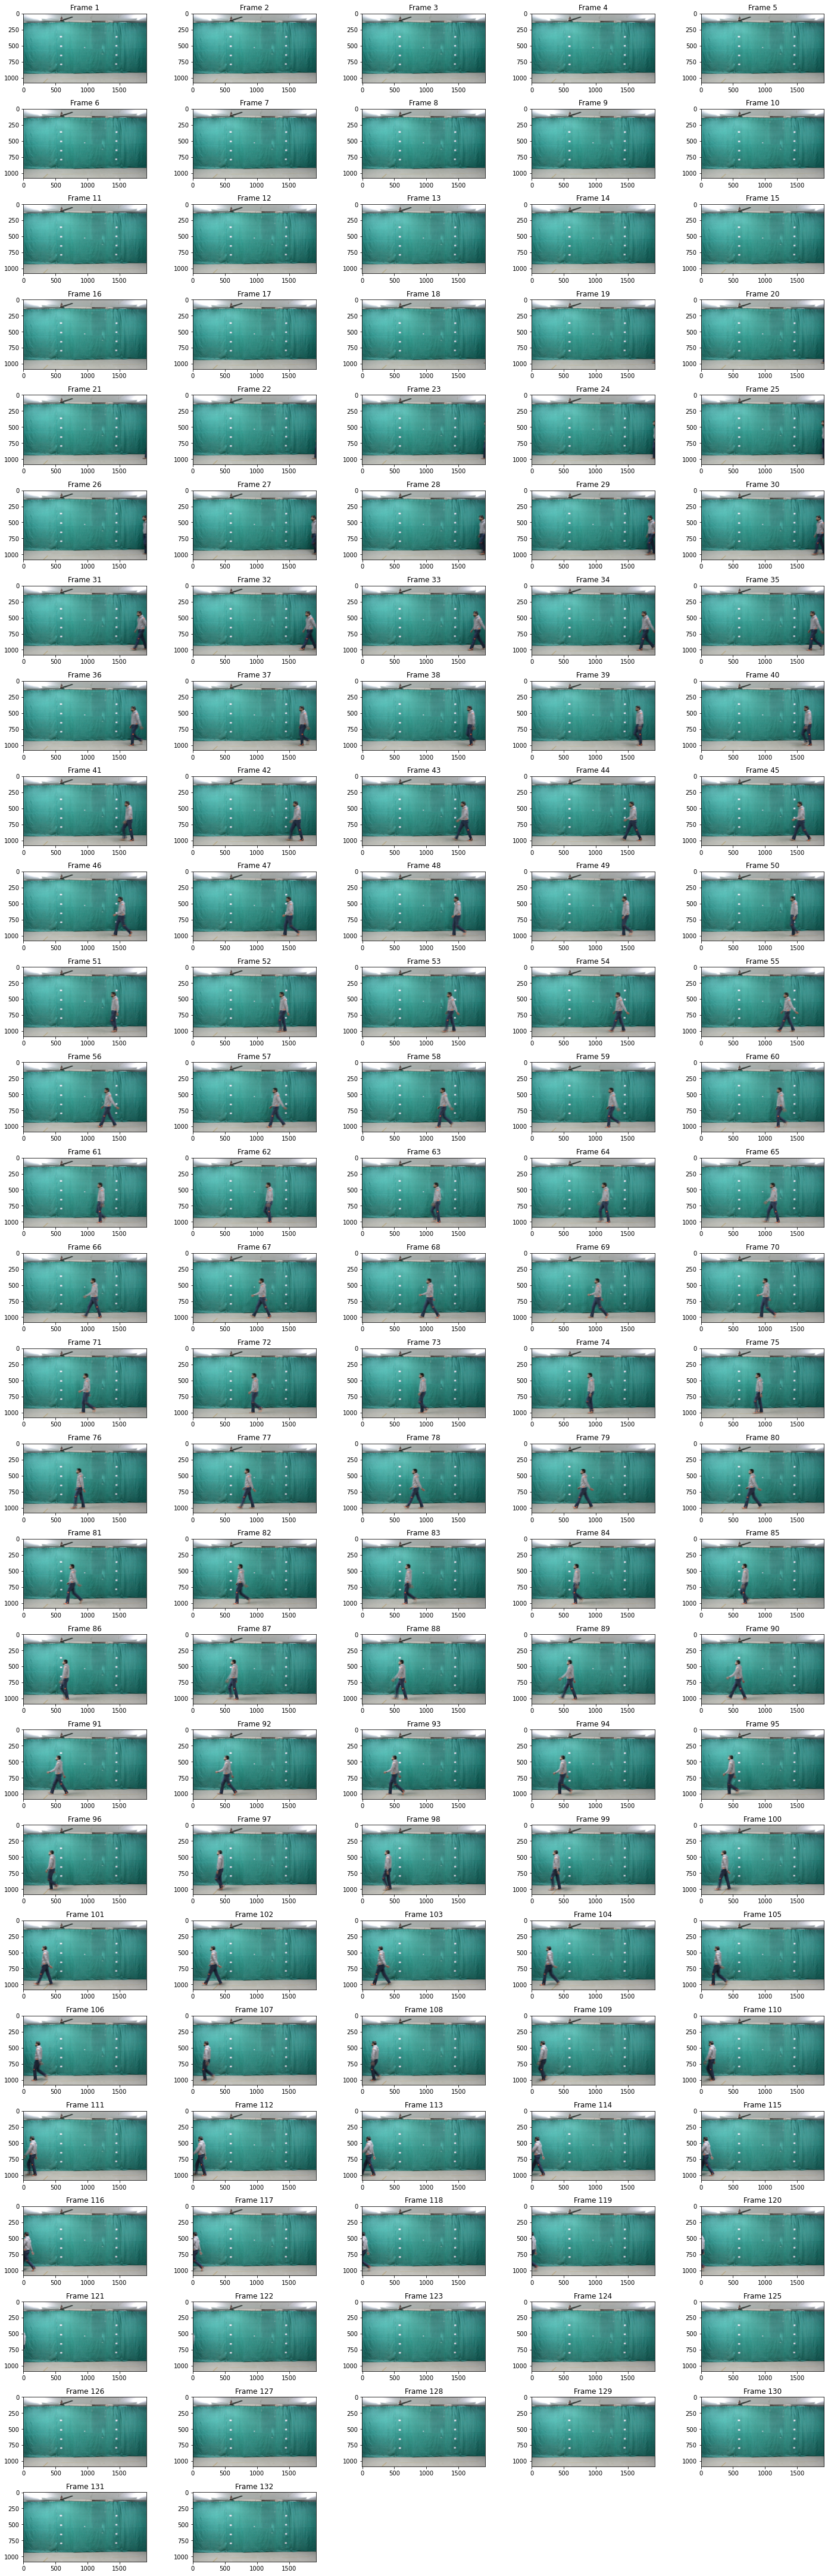

In [151]:
# Check if camera opened successfullyL:
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
plt.figure(figsize=(20,100), tight_layout=True)

# Read until video is completed
frameCount = 1

while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    # Saving each frame:
    print("Saving frame", frameCount, "...")
    cv2.imwrite(f"frame{frameCount}.png", frame)
    plt.subplot(45,5,frameCount), plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)), plt.title(f"Frame {frameCount}")
    frameCount = frameCount+1
    
    # Press Q on keyboard to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
    
  # Break the loop
  else: 
    break
    
# Going back to the old directory:
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
    
# When everything done, release the video capture object
#cap.release()

# Closes all the frames
#cv2.destroyAllWindows()

### Task 3 . Extract the Red components from each image.

- Create a function based on your LAB Assignment 4

- From the image, extract the red components in the image.

- Label all the connected components in the image.

- To draw line between points for all 5 red color markers

In [152]:
# extracting the red components only from the image

def red_image(image):
    # Getting the hsv-converted image:
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Masking to get only the required red/orange spots:
    mask = cv2.inRange(hsv, np.array([0,140,200]), np.array([10,250,255]))
    
    # Extracting only the red region by using bitwise_and on the mask and the original image:
    red_only = cv2.bitwise_and(image, image, mask=mask)

    return red_only

# red_img = red_image(cv2.imread('frame1.png'))

In [153]:
# bound rectangles on the red components:

# Getting the edges of the red points in the image:

def get_coordinates_of_spots(original_image, red_only):
    #  Finding the Canny Edges
    edges = cv2.Canny(red_only, 100, 200)

    # Finding the coordinates of the non-block spots in the image and getting the zip of indices
    indices = np.where(edges != [0])
    coordinates = list(zip(indices[0], indices[1]))
    if len(coordinates)==0:
        return []
    # Declaring neccessary variables:
    top_left = list((coordinates)[0])
    bottom_right = list(coordinates[0])
    coordinates_of_spots = [] #declaring an empty list for spots-coordinates

    # Drawing rectangular boxses over the spots

    # Defining a function to draw rectangles given a top_left and bottom_right coordinate:
    def draw_rectangles(top_left, bottom_right):
        coordinates_of_spots.append(tuple(((int(top_left[0]-10), int(top_left[1]-10)), (int(bottom_right[0]+10), int(bottom_right[1]+10)))))

    # Iterating through each and every coordinate and grouping them according to their proximity:
    for x in coordinates:
        thresh = 25
        top_left_diff = (top_left[0]-x[0], top_left[1]-x[1])
        bottom_right_diff = (x[0]-bottom_right[0], x[1]-bottom_right[1])
        if abs(top_left_diff[0]) <= thresh and abs(top_left_diff[1]) <= thresh:
            if(top_left[0] > 0 or top_left[1]>0):
                top_left[0] = x[0]
                top_left[1] = x[1]
        elif abs(bottom_right_diff[0]) <= thresh and abs(bottom_right_diff[1]) <= thresh:
            if(bottom_right[0] > 0 or bottom_right[1] > 0):
                bottom_right[0] = x[0]
                bottom_right[1] = x[1]
        else:
            draw_rectangles((bottom_right[1], bottom_right[0]), (top_left[1], top_left[0]))
            top_left = list((x[0], x[1]))
            bottom_right = list((x[0], x[1]))

    # Also drawing the rectangle on the last group that we make after the loop:              
    draw_rectangles((bottom_right[1], bottom_right[0]), (top_left[1], top_left[0]))
    coordinates_of_spots = list(map(lambda x: (int((x[1][0]+x[0][0])/2), int((x[1][1]+x[0][1])/2)), coordinates_of_spots))
    #print("before", coordinates_of_spots)
    coordinates_of_spots = list(map(lambda x: x if len(x)<=5 else list([]), coordinates_of_spots))
    #print("after", coordinates_of_spots)
    return coordinates_of_spots

In [154]:
# Looping through each image:

all_coordinates = []

for x in range(132):
    image = cv2.imread(f"./Frames/frame{x+1}.png")
    red_img = red_image(image)
    coordinates_of_spots = get_coordinates_of_spots(image, red_img)
    all_coordinates.append(coordinates_of_spots if len(coordinates_of_spots)<=5 else [])

### Task 4. LOOP to extract 5 marker coordinates markers for all frames / images

Coordiantes (x,y) for all markers
- M1: Shoulder;
- M2: Hip;
- M3: Knee;
- M4: Ankle;
- M5: Toe;

In [155]:
# Differentiating the coordinates for all the markers:

def map_to_dict(coordinates):
    if(len(coordinates)>5):
        return {}
    dict = {}
    m4_and_m5 = []
    for (x,y) in coordinates:
        if y>900: 
            m4_and_m5.append((x,y))
        if y>=500 and y<=530:
            dict["M1"] = (x, y)
        elif y>=660 and y<=690:
            dict["M2"] = (x, y)
        elif y>=820 and y<=855:
            dict["M3"] = (x, y)
            
    if len(m4_and_m5)>2:
        return {}
    
    if len(m4_and_m5)==2:
        if(m4_and_m5[0][1]>m4_and_m5[1][1]):
            dict["M4"] = (m4_and_m5[1])
            dict["M5"] = (m4_and_m5[0])
        else:
            dict["M5"] = (m4_and_m5[1])
            dict["M4"] = (m4_and_m5[0])
            
    if len(m4_and_m5)==1:
        if(m4_and_m5[0][1]>1000):
            dict["M5"] = m4_and_m5[0]
        else:
            dict["M4"] = m4_and_m5[0]    
    return dict

In [156]:
# Applying the map function on the coordinate list to mark each coordinate:

# Saving all the frames regardless of how many spots are present in them:
marked_spots = list(map(map_to_dict, all_coordinates))

# Saving only those frames' values that have atleast one spot in them
marked_spots_no_empty = [ elem for elem in list(map(map_to_dict, all_coordinates)) if len(elem) != 0]  

#Printing all the values in the list:
for x in marked_spots_no_empty:
    print(x)

{'M2': (1918, 663), 'M5': (1864, 989), 'M4': (1894, 984)}
{'M1': (1880, 513), 'M2': (1859, 673), 'M3': (1797, 829), 'M4': (1715, 992)}
{'M1': (1805, 519), 'M2': (1781, 673), 'M3': (1719, 831), 'M5': (1679, 1002), 'M4': (1716, 991)}
{'M1': (1777, 517), 'M2': (1762, 673), 'M3': (1713, 833), 'M5': (1678, 1002), 'M4': (1712, 988)}
{'M1': (1754, 516), 'M2': (1744, 669), 'M3': (1703, 834), 'M5': (1678, 1003), 'M4': (1711, 989)}
{'M1': (1737, 512), 'M3': (1701, 834), 'M5': (1677, 1004), 'M4': (1712, 988)}
{'M1': (1701, 510), 'M3': (1690, 835), 'M5': (1680, 1003), 'M4': (1710, 988)}
{'M1': (1679, 510), 'M2': (1686, 664), 'M3': (1680, 837), 'M5': (1679, 1003), 'M4': (1711, 987)}
{'M1': (1662, 511), 'M2': (1672, 666), 'M3': (1673, 837), 'M5': (1679, 1003), 'M4': (1708, 986)}
{'M1': (1640, 513), 'M2': (1653, 667), 'M3': (1664, 840), 'M5': (1678, 1003), 'M4': (1706, 986)}
{'M1': (1615, 517), 'M2': (1628, 672), 'M3': (1650, 841), 'M5': (1675, 1003), 'M4': (1707, 983)}
{'M1': (1586, 518), 'M2': (161

### Task 5. Save the Data in CSV format by the name of "coordinate.csv"

- It Should be having 10 column (x1,y1, x2,y2, .... , x5,y5) and
rows equal to no of frames/images in the video.
- M1 (x1,y1)
- M2 (x2,y2)
- : :
- M5 (X5,y5)

In [157]:
# Using pandas to create a data frame from the dictionaries created in the previous task
df = pd.DataFrame(marked_spots)
df_no_empty = pd.DataFrame(marked_spots_no_empty)

df.to_csv('coordinate.csv') 

# Displaying the list of dictionary containing the marked coordinates (from the previous task)
df

M2   M5   M4   M1   M3
0    NaN  NaN  NaN  NaN  NaN
1    NaN  NaN  NaN  NaN  NaN
2    NaN  NaN  NaN  NaN  NaN
3    NaN  NaN  NaN  NaN  NaN
4    NaN  NaN  NaN  NaN  NaN
..   ...  ...  ...  ...  ...
127  NaN  NaN  NaN  NaN  NaN
128  NaN  NaN  NaN  NaN  NaN
129  NaN  NaN  NaN  NaN  NaN
130  NaN  NaN  NaN  NaN  NaN
131  NaN  NaN  NaN  NaN  NaN

[132 rows x 5 columns]

In [158]:
# Displaying the dataframe that doesnt contain any empty data:
df_no_empty

M2            M5           M4           M1           M3
0   (1918, 663)   (1864, 989)  (1894, 984)          NaN          NaN
1   (1859, 673)           NaN  (1715, 992)  (1880, 513)  (1797, 829)
2   (1781, 673)  (1679, 1002)  (1716, 991)  (1805, 519)  (1719, 831)
3   (1762, 673)  (1678, 1002)  (1712, 988)  (1777, 517)  (1713, 833)
4   (1744, 669)  (1678, 1003)  (1711, 989)  (1754, 516)  (1703, 834)
..          ...           ...          ...          ...          ...
58    (22, 682)           NaN   (152, 980)    (17, 526)    (48, 855)
59    (14, 682)    (140, 993)   (141, 950)     (4, 524)          NaN
60          NaN    (109, 983)   (111, 938)          NaN          NaN
61          NaN     (56, 977)    (73, 938)          NaN          NaN
62          NaN      (9, 981)    (21, 937)          NaN          NaN

[63 rows x 5 columns]

### Task 6. Display Original Coordinate Trajectory

(<AxesSubplot:title={'center':'Original Trajectory'}>,
 Text(0.5, 1.0, 'Original Trajectory'))

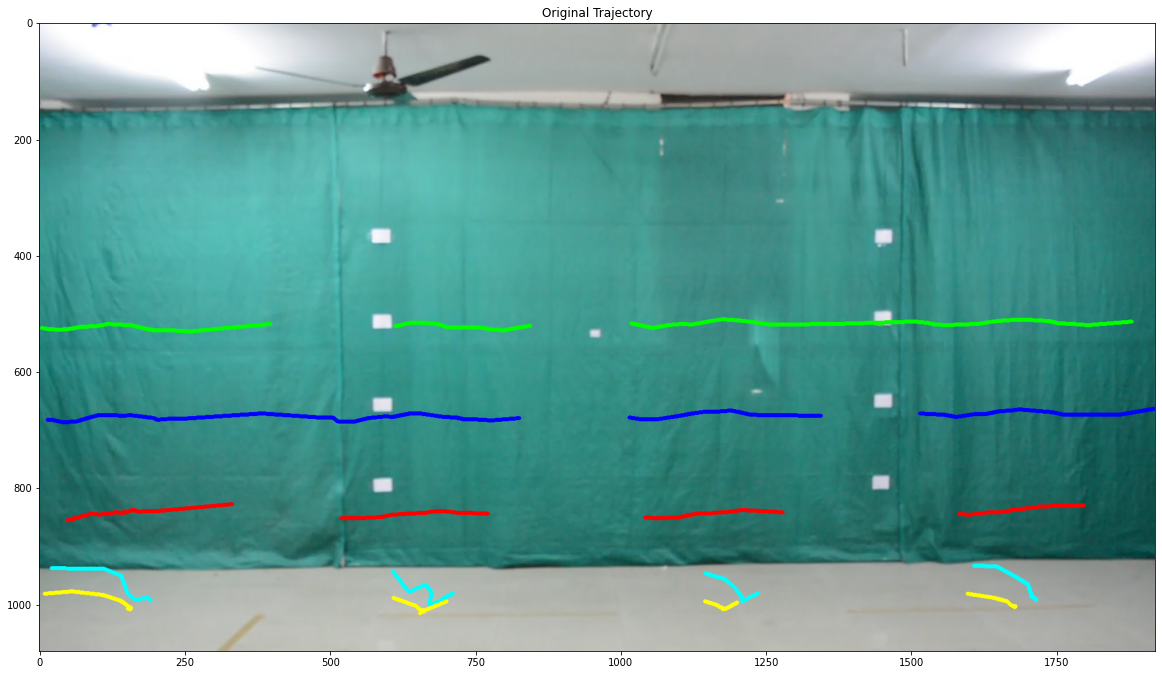

In [298]:
# We will draw the trajectory on the first frame, where there is no man
# Importing the first frame using OpenCV:
image = cv2.imread("./Frames/frame1.png")

colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]

for x in range(5):
    points = [list(elem) for elem in list(df_no_empty[f"M{x+1}"]) if elem==elem]
    for y in range(1, len(points)):
        if((points[y-1][0]-points[y][0])>155):
            continue
        image = cv2.line(image, tuple(points[y-1]), tuple(points[y]), colors[x], thickness=6)
            
plt.figure(figsize=(20,20))
plt.subplot(1,1,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title(f"Original Trajectory")

### Task 7: Handle Missing Data

Hint : use
- Linear interpolation Techniques as discussed in the paper.

    or


- your own method

In [231]:
# In order to do linear interpolation using pandas, we need to have each column as an integer, and not a tuple of (x, y)

def map_function_x(elem):
    return elem[0] if elem==elem else float("nan")
def map_function_y(elem):
     return elem[1] if elem==elem else float("nan")
        
sep_df = pd.DataFrame()

for index in range(5):
    marked_list = list(df[f"M{index+1}"])
    x = list(map(map_function_x, marked_list))
    y = list(map(map_function_y, marked_list))
    sep_df[f"M{index+1}_x"] = x
    sep_df[f"M{index+1}_y"] = y
    
print("before",list( sep_df["M1_x"]))
new_sep_df = sep_df.interpolate(method='linear', limit_direction='forward', axis=0, limit=50) 
new_sep_df

before [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1880.0, 1861.25, 1842.5, 1823.75, 1805.0, 1777.0, 1754.0, 1737.0, 1701.0, 1679.0, 1662.0, 1640.0, 1615.0, 1586.0, 1563.0, 1541.0, 1527.0, 1506.0, 1486.4285714285713, 1466.857142857143, 1447.2857142857142, 1427.7142857142858, 1408.142857142857, 1388.5714285714284, 1369.0, 1347.0, 1325.0, 1303.0, 1281.0, 1256.0, 1229.0, 1203.0, 1176.0, 1156.0, 1123.0, 1107.0, 1082.0, 1055.0, 1033.0, 1018.0, 996.375, 974.75, 953.125, 931.5, 909.875, 888.25, 866.625, 845.0, 821.5, 798.0, 774.0, 758.0, 730.0, 703.0, 685.0, 661.0, 639.0, 612.0, 590.6, 569.2, 547.8, 526.4, 505.0, 483.6, 462.20000000000005, 440.8, 419.4, 398.0, 374.8333333333333, 351.6666666666667, 328.5, 305.3333333333333, 282.16666666666663, 259.0, 243.0, 226.0, 197.0, 177.0, 157.0, 130.0, 119.0, 97.0, 72.0, 56.0, 35.0, 17.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4

M1_x   M1_y  M2_x   M2_y  M3_x   M3_y  M4_x   M4_y  M5_x   M5_y
0     NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN
1     NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN
2     NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN
3     NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN
4     NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN   NaN    NaN
..    ...    ...   ...    ...   ...    ...   ...    ...   ...    ...
127   4.0  524.0  14.0  682.0  48.0  855.0  21.0  937.0   9.0  981.0
128   4.0  524.0  14.0  682.0  48.0  855.0  21.0  937.0   9.0  981.0
129   4.0  524.0  14.0  682.0  48.0  855.0  21.0  937.0   9.0  981.0
130   4.0  524.0  14.0  682.0  48.0  855.0  21.0  937.0   9.0  981.0
131   4.0  524.0  14.0  682.0  48.0  855.0  21.0  937.0   9.0  981.0

[132 rows x 10 columns]

### Task 8: Final Coordinate Trajectory after Filling the data as shown in figure (g) under methodlogy .

- Each Trajectory can be shown with a diffent color

(<AxesSubplot:title={'center':'Final Trajectory'}>,
 Text(0.5, 1.0, 'Final Trajectory'))

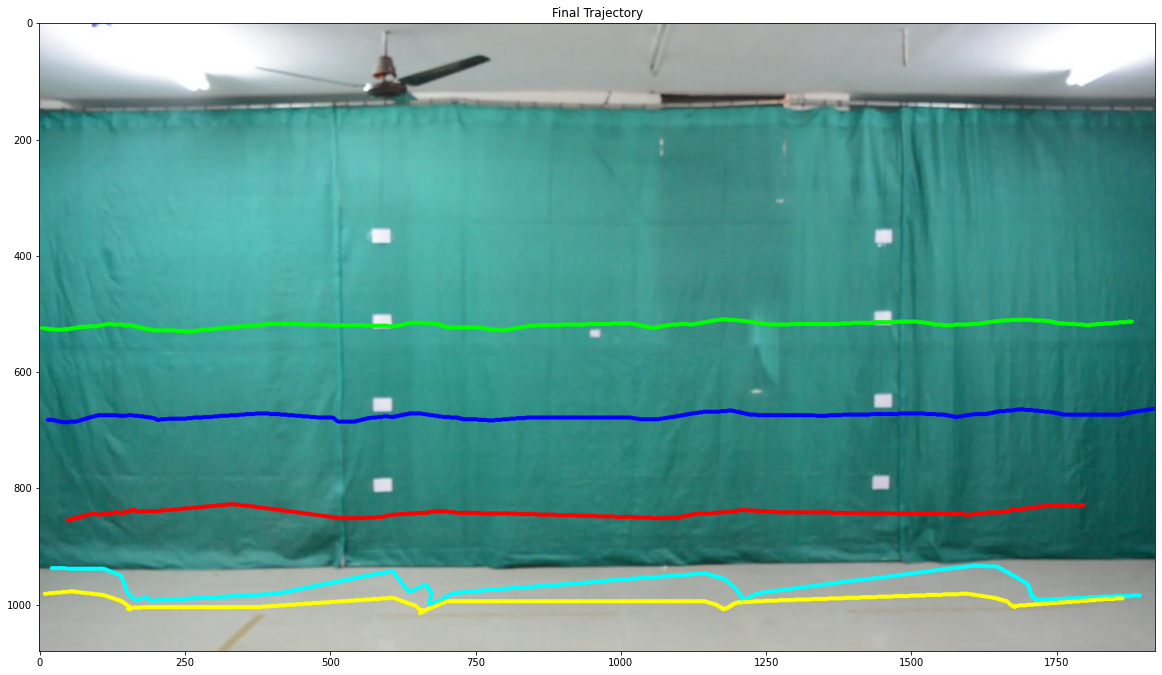

In [299]:
# We will draw the trajectory on the first frame, where there is no man
# Importing the first frame using OpenCV:
image = cv2.imread("./Frames/frame1.png")

colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]

for x in range(5):
    zipped = list(zip(new_sep_df[f"M{x+1}_x"], new_sep_df[f"M{x+1}_y"]))
    df[f"M{x+1}"] = zipped
    points = [ list(elem) for elem in list(zipped) if elem==elem and elem[0]==elem[0]]
    points = np.array(points, np.int32)
    points = points.reshape((-1, 1, 2)) 
    image = cv2.polylines(image, [points], False, colors[x], 6) 
    
plt.figure(figsize=(20,20))
plt.subplot(1,1,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title(f"Final Trajectory")

### Task 9: Kimematic Parameters Estimation : Knee Angle

In [258]:
def calculate_theta(M2, M3, M4):
    line1 = (M3[0]-M2[0], M3[1]-M2[1])
    line2 = (M4[0]-M3[0], M4[1]-M3[1])
    dot_product = line1[0]*line2[0] + line1[1]*line2[1]
    magnitude_of_line1 = math.sqrt(line1[0]**2 + line1[1]**2)
    magnitude_of_line2 = math.sqrt(line2[0]**2 + line2[1]**2)
    result = dot_product/(magnitude_of_line1*magnitude_of_line2)
    theta = math.degrees(math.acos(result))
    return theta

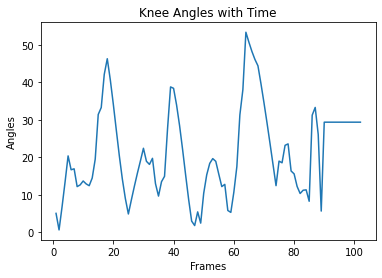

In [302]:
knee_angles = []

list_of_M2 = list(df["M2"])
list_of_M3 = list(df["M3"])
list_of_M4 = list(df["M4"])

for x in range(len(list_of_M3)):
    if list_of_M2[x][0]!=list_of_M2[x][0] or list_of_M3[x][0]!=list_of_M3[x][0] or list_of_M4[x][0]!=list_of_M4[x][0]:
        continue
    else:
        theta_val = calculate_theta(list_of_M2[x], list_of_M3[x], list_of_M4[x])
        knee_angles.append(theta_val)
        
# Graphing the angles as the frames move forward:
plt.plot(range(1, len(knee_angles)+1), knee_angles) 
  
# naming the x axis 
plt.xlabel('Frames') 
# naming the y axis 
plt.ylabel('Angles') 
  
# giving a title to my graph 
plt.title('Knee Angles with Time') 
  
# function to show the plot 
plt.show() 


### Your Learning :

This exercise extended my knowledge for image/video processing and feature extraction. I had a very huge intuition of this process in the previous task and this task helped my intuitions a bit more sturdy by applying it on a video and doing even more operations on it. 